<a href="https://colab.research.google.com/github/rianmsofian/DQLab-Project/blob/main/Rian_Muhammad_Sofian_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation**

---





In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_excel('SuperStore.xlsx')

# **Data Cleaning**

---



In [3]:
# Checking for missing value
missing_values = df.isnull().sum()
print(missing_values)

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64


In [4]:
# See 5 colomn
display(df.head())

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [5]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        9994 non-null   object        
 1   Customer_ID     9994 non-null   object        
 2   Postal_Code     9994 non-null   int64         
 3   Product_ID      9994 non-null   object        
 4   Sales           9994 non-null   float64       
 5   Quantity        9994 non-null   int64         
 6   Discount        9994 non-null   float64       
 7   Profit          9994 non-null   float64       
 8   Category        9994 non-null   object        
 9   Sub-Category    9994 non-null   object        
 10  Product_Name    9994 non-null   object        
 11  Order_Date      9994 non-null   datetime64[ns]
 12  Ship_Date       9994 non-null   datetime64[ns]
 13  Ship_Mode       9994 non-null   object        
 14  Customer_Name   9994 non-null   object        
 15  Segm

In [6]:
# check for data duplicate
duplicates = df.duplicated().sum()
print(duplicates)

1


In [7]:
# Clean data duplication
df_cleaned = df.drop_duplicates()
print("Data after clean duplication:", df_cleaned.shape)

Data after clean duplication: (9993, 20)


# **Data Processing**

---



In [8]:
# Convert Order_Date and Ship_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [9]:
# Extract month and year from Order_Date and Ship_Date
df['Order_Month'] = df['Order_Date'].dt.month_name().str[:3]
df['Ship_Month'] = df['Ship_Date'].dt.month_name().str[:3]
df['Year_Order'] = df['Order_Date'].dt.year

In [10]:
# Create a new feature 'Profit Margin'
df['Profit Margin'] = df['Profit'] / df['Sales']

#**EDA and Visualization**

---



In [12]:
# Descriptive statistics
df[['Quantity', 'Discount', 'Sales', 'Profit']].describe()

,Quantity,Discount,Sales,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.789574,0.156203,229.858001,28.656896
std,2.225110,0.206452,623.245101,234.260108
min,1.000000,0.000000,0.444000,-6599.978000
25%,2.000000,0.000000,17.280000,1.728750
50%,3.000000,0.200000,54.490000,8.666500
75%,5.000000,0.200000,209.940000,29.364000
max,14.000000,0.800000,22638.480000,8399.976000


In [11]:
# Unique values in categorical columns
df[['Category', 'Sub-Category', 'Segment', 'Region', 'Ship_Mode']].nunique()

,0
Category,3
Sub-Category,17
Segment,3
Region,4
Ship_Mode,4


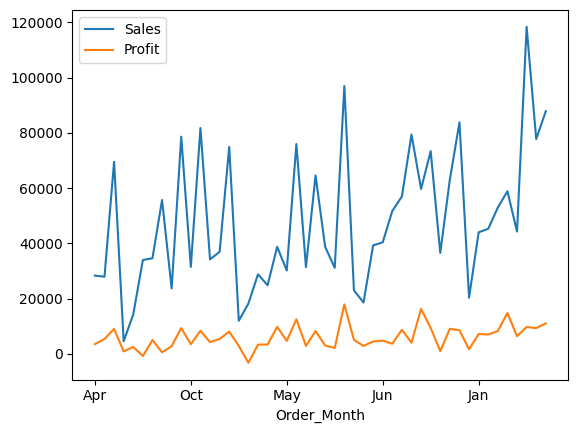

In [13]:
# Sales and profit trend over time
df_sales_trend = df.groupby(['Year_Order', 'Order_Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_sales_trend.plot(x='Order_Month', y=['Sales', 'Profit'], kind='line')
plt.show()

**Sales and Profit Trends**

The line graph illustrates the monthly trends in sales and profit, showing noticeable fluctuations over time. Sales exhibit high volatility, with several peaks and drops, indicating seasonal demand variations. Profit follows a similar pattern but remains consistently lower than sales, highlighting potential cost-related challenges.

One key observation is the presence of sharp spikes in sales, suggesting periods of increased consumer demand. These fluctuations emphasize the importance of targeted marketing efforts during peak months to maximize revenue. Additionally, optimizing pricing strategies and cost management could help improve profit margins and create a more stable financial performance.

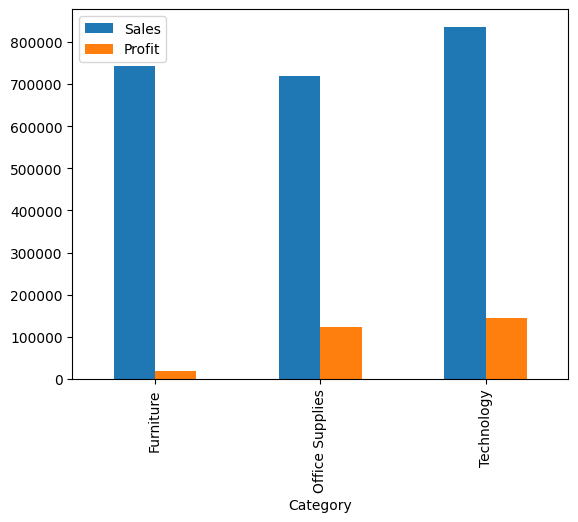

In [14]:
#Category-wise sales and profit
df_category_sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
df_category_sales_profit.plot(x='Category', y=['Sales', 'Profit'], kind='bar')
plt.show()  # Display the plot

**Product Category Analysis**

The bar chart compares total sales and profit for each product category, providing insights into their performance. The Technology category records the highest total sales, exceeding $800,000, with a strong profit contribution. Meanwhile, Office Supplies has slightly lower sales than Furniture but achieves a higher profit margin, making it a more profitable category. In contrast, the Furniture category, despite having high sales, generates the lowest profit, indicating higher costs or lower margins.

These insights highlight the need for strategic decision-making. The Technology category should be prioritized due to its strong revenue and profitability. Additionally, Furniture requires pricing adjustments or cost optimization to improve margins, while Office Supplies remains a balanced performer with both stable sales and profit potential.

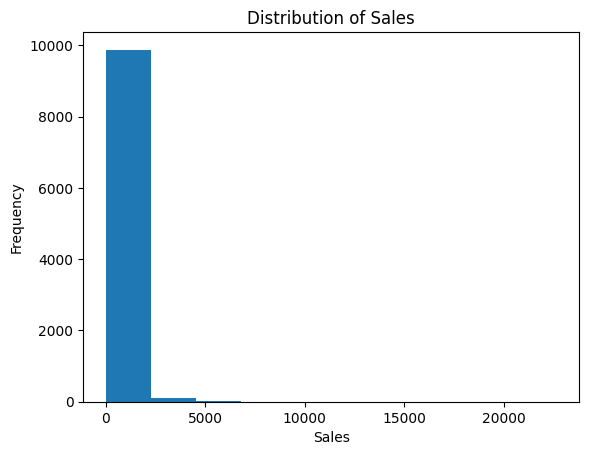

In [15]:
# Histogram of Sales
plt.hist(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

**Sales Distribution**

The histogram illustrates the distribution of sales values, showing how frequently different sales amounts occur. The data reveals that most transactions are highly concentrated in the lower sales range, with the majority falling below $5,000. There are very few transactions exceeding $10,000, indicating that high-value sales are rare.

This distribution suggests that most sales come from smaller transactions, while large sales occur infrequently. To improve revenue, businesses could explore strategies such as upselling, bundling, or targeting high-value customers to increase the number of larger transactions.

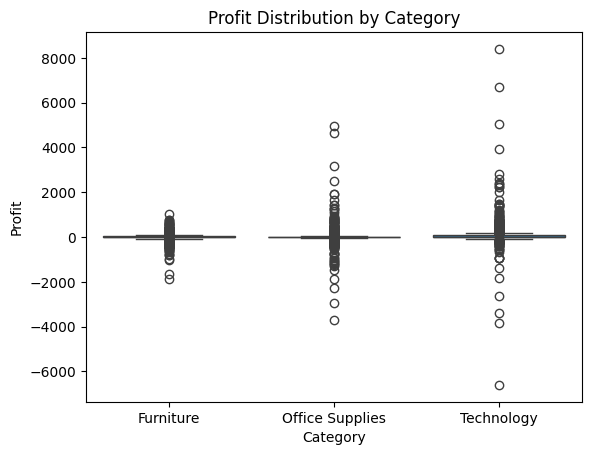

In [16]:
# Box plot of Profit by Category
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.show()

**Profit Analysis by Category**

he box plot illustrates the profit distribution across different product categories, revealing key patterns in profitability. The presence of numerous outliers in all categories suggests significant variation in individual transaction profits. Among the three categories, Technology shows the widest spread, indicating that while some products generate high profits, others result in losses.

The Office Supplies and Furniture categories display similar distributions, with profits largely concentrated around the median but still containing several extreme values. Additionally, the presence of negative outliers across all categories suggests that certain transactions resulted in losses, potentially due to discount strategies, high costs, or ineffective pricing models.

These insights highlight the inconsistent profitability among product categories. Businesses should explore pricing optimization, targeted promotions, and a focus on high-margin products to enhance overall profitability and minimize losses.

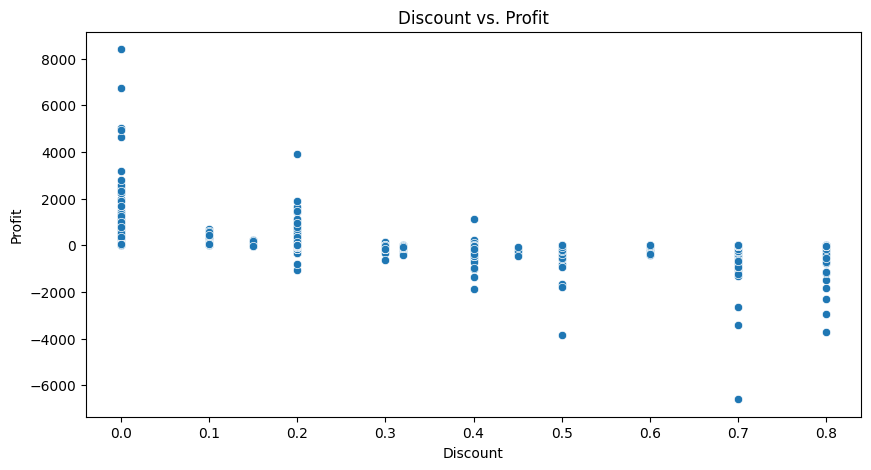

In [17]:
# Scatter plot of Discount vs. Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.show()

**Relationship Between Discounts and Profit**

The scatter plot visualizes the relationship between discount rates and profit, showing how different levels of discounts influence profitability. The general trend suggests that higher discounts often lead to lower profits, with some transactions even resulting in negative profits. This indicates that excessive discounting may erode profit margins significantly.

However, a few high-discount transactions still yield considerable profits, suggesting that certain products or customer segments respond well to discount strategies. This highlights the complex nature of discounting, where factors such as product type, demand elasticity, and pricing structure play a crucial role in determining profitability.

Insights from this analysis emphasize the need for a balanced discounting strategy. Businesses should consider targeted discounts that attract customers without heavily compromising profit, such as volume-based discounts, loyalty programs, or limited-time offers.

In [ ]:
# Save the DataFrame back to an Excel file
df.to_excel('superstore_data_updated.xlsx', index=False)

# **Conclusion & Suggestions**

**Conclusion**

The analysis reveals that the "Technology" category has the highest profit potential, followed by "Office Supplies" and "Furniture" with more moderate profitability. The seasonal sales pattern indicates that sales and profit tend to peak towards the end of the year, highlighting the importance of aggressive marketing strategies during this period to maximize revenue.

Additionally, the negative correlation between discounts and profit suggests that uncontrolled discounting can significantly reduce profitability. However, some high-discount transactions still yield considerable profits, indicating that a more strategic approach to discounting is necessary. Businesses should optimize discount strategies by targeting specific products or customer segments to enhance profitability while maintaining competitive pricing.

These insights form a solid foundation for data-driven decision-making, enabling businesses to enhance category performance, align marketing efforts with seasonal trends, and refine discounting strategies to sustain profitability.

**Suggestion**

1. Optimize "Office Supplies" Category Performance – Implement targeted marketing campaigns and strategic promotions to enhance sales in this category, as it shows potential for growth.

2. Enhance Profitability in "Furniture" and "Technology" – Conduct a pricing and procurement review to maximize profit margins, ensuring competitive yet profitable pricing strategies.

3. Refine Discount Strategies – Apply data-driven discounting by analyzing its impact on profitability. Discounts should be used selectively to attract customers without significantly reducing overall profits.

4. Implement Customer Retention Initiatives – Develop a customer loyalty program to encourage repeat purchases, particularly in the most profitable categories, ensuring sustained revenue growth and improved customer engagement.